In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [4]:
plt.rc("font", family="Malgun Gothic")

## 시계열 데이터
#### 독립변인이 Date 이고 index이다
#### 간격을 주의해서 봐야한다. 모든 기간 통일

In [5]:
# fdr.DataReader("005930")
# fdr.DataReader("BTC/KRW", "2022")
# type(fdr.DataReader("TSLA","2022" ))
# fdr.DataReader("TSLA","2022" )
# fdr.DataReader("AAPL", "2022")

# 005930
samsung = fdr.DataReader("005930")
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-12-24,1522,1549,1488,1532,941106,NaN
1998-12-28,1570,1570,1503,1546,537290,0.009138
1999-01-04,1776,1776,1624,1693,666160,0.095084
1999-01-05,1692,1712,1649,1673,643209,-0.011813
1999-01-06,1702,1720,1651,1718,645110,0.026898


In [6]:
def show_ts(df):
    plt.figure(figsize=(13,6))
    sns.lineplot(x=df.index, y="Close", data=df)
    plt.xlabel("시간")
    plt.ylabel("가격(종가)")
    plt.show()

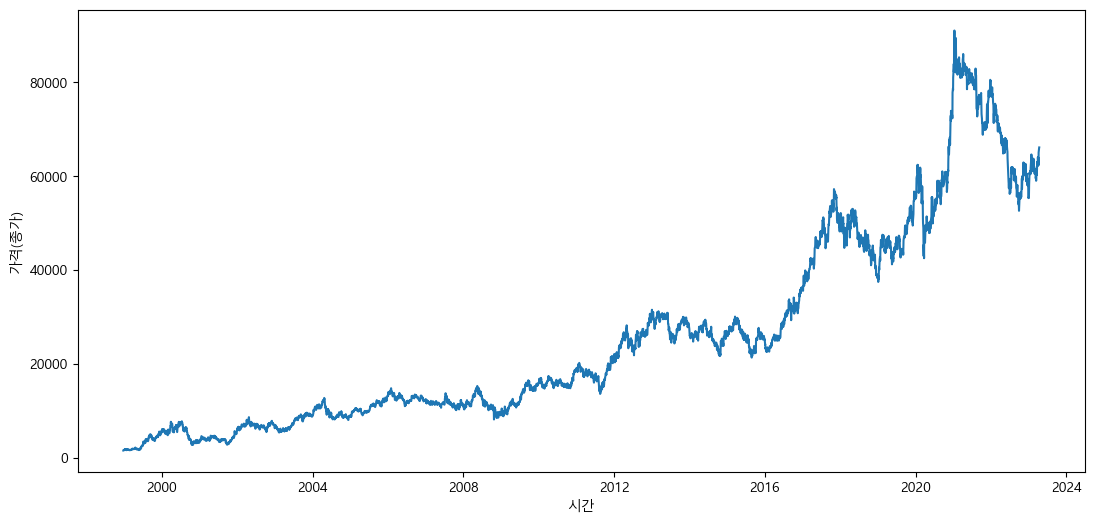

In [7]:
# btc = fdr.DataReader("BTC/KRW")
# show_ts(btc)
show_ts(samsung)

In [8]:
time_steps =[
             ["1990","2000"],
             ["2000","2010"],
             ["2010","2015"],
             ["2015","2020"],
             ["2020","2022"]]
# 이렇게 데이터를 나룰수가 없는데 prophet이 해줌

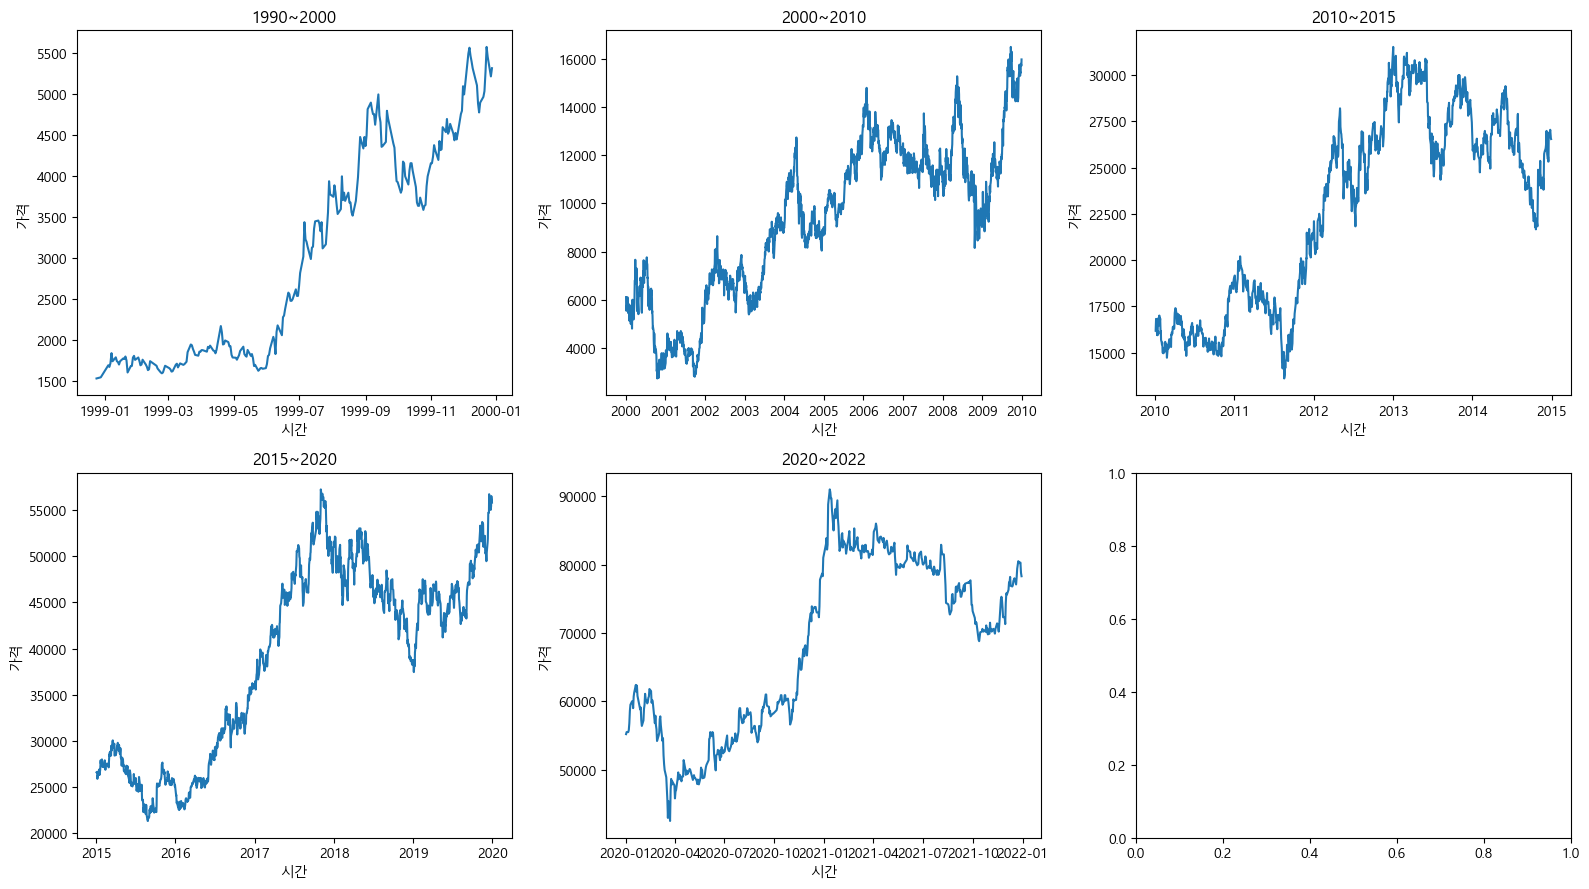

In [9]:
fig,axes = plt.subplots(2,3)
fig.set_size_inches(16,9)
for i in range(5):
    ax = axes[i//3, i%3] 
    df = samsung.loc[(samsung.index > time_steps[i][0]) &(samsung.index < time_steps[i][1])]
    sns.lineplot(x=df.index, y=df["Close"], ax=ax)
    ax.set_title(f"{time_steps[i][0]}~{time_steps[i][1]}")
    ax.set_xlabel("시간")
    ax.set_ylabel("가격")
plt.tight_layout()
plt.show()
    # index => date
    # pass
   

In [12]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
# prophet 사용

y컬럼과 ds 컬럼이 존재해야 됨

In [15]:
# 1 데이터 가공 (NA 제거하지 않음)
stock = fdr.DataReader("005930", "2022")
stock["y"] = stock["Close"]
stock["ds"] = stock.index
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831,78600,2022-01-03
2022-01-04,78800,79200,78300,78700,12427416,0.001272,78700,2022-01-04
2022-01-05,78800,79000,76400,77400,25470640,-0.016518,77400,2022-01-05
2022-01-06,76700,77600,76600,76900,12931954,-0.006460,76900,2022-01-06
2022-01-07,78100,78400,77400,78300,15163757,0.018205,78300,2022-01-07


In [17]:
# 2. 원데이터를 fit 시킴
m = Prophet()
m.fit(stock)

16:22:21 - cmdstanpy - INFO - Chain [1] start processing
16:22:21 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
# 3.예측을 원하는 기간(D) 설정  predict. yhat(예측값)
future = m.make_future_dataframe(periods=30) # 기간정함
future.tail()

,ds
342,2023-05-09
343,2023-05-10
344,2023-05-11
345,2023-05-12
346,2023-05-13


In [23]:
# 4. 예측
forecast = m.predict(future)
forecast.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
342,2023-05-09,64072.079937,61515.607192,66360.380263,63901.848208,64211.511238,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,0.0,0.0,0.0,63901.909904
343,2023-05-10,64100.308690,61544.993263,66182.867458,63919.355753,64245.334285,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,0.0,0.0,0.0,63932.369444
344,2023-05-11,64128.537443,61536.594235,66342.554840,63937.251779,64281.691684,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,0.0,0.0,0.0,63910.699782
345,2023-05-12,64156.766196,61803.303000,66839.339290,63957.444298,64321.738081,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,0.0,0.0,0.0,64137.238837
346,2023-05-13,64184.994949,62055.572403,66944.977343,63969.516034,64359.017333,349.894022,349.894022,349.894022,349.894022,349.894022,349.894022,0.0,0.0,0.0,64534.888971


In [31]:
# loc 를 사용할수 없음 index 가 date 이므로
# 예측 상하한값
forecast[["ds", "yhat", "yhat_upper", "yhat_lower"]].iloc[-40:-20]

,ds,yhat,yhat_upper,yhat_lower
307,2023-03-31,62951.631210,65476.832376,60517.150952
308,2023-04-03,62931.531191,65394.532616,60634.577439
309,2023-04-04,62913.903549,65470.911922,60532.414869
310,2023-04-05,62944.363088,65336.285803,60356.792292
311,2023-04-06,62922.693426,65166.312206,60614.658067
312,2023-04-07,63149.232481,65492.654780,60860.095598
313,2023-04-10,63129.132462,65470.861787,60763.738193
314,2023-04-11,63111.504820,65601.894925,60741.140201
315,2023-04-12,63141.964359,65515.730059,60719.421129
316,2023-04-13,63120.294698,65541.026487,60631.437971


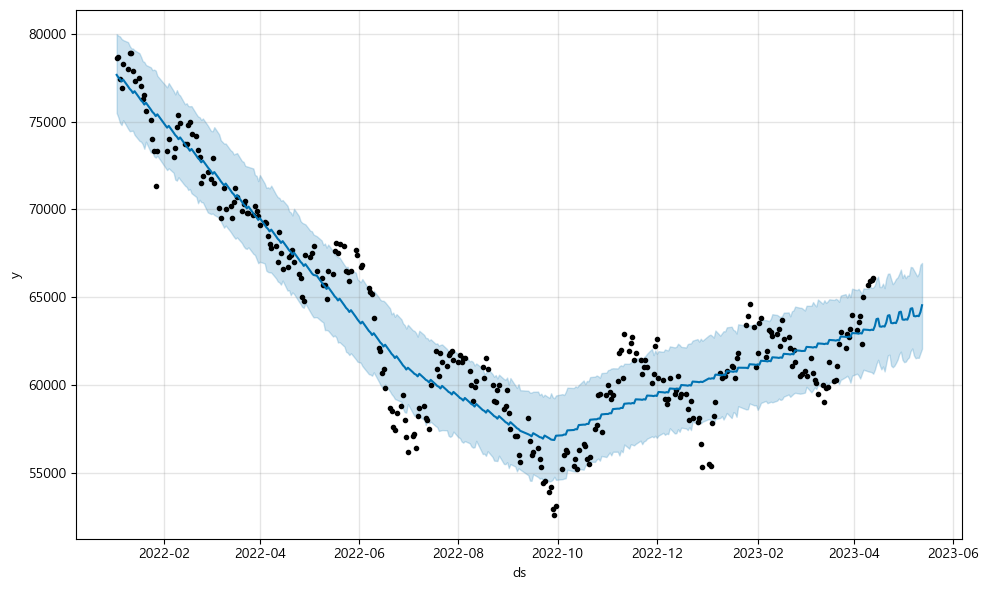

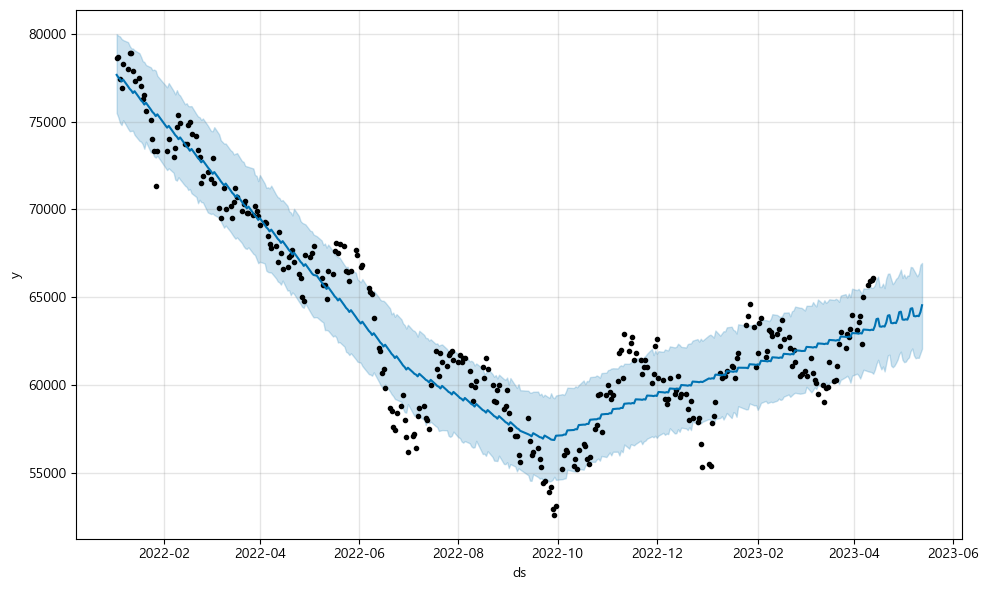

In [33]:
# 전체 데이터 확인
m.plot(forecast)

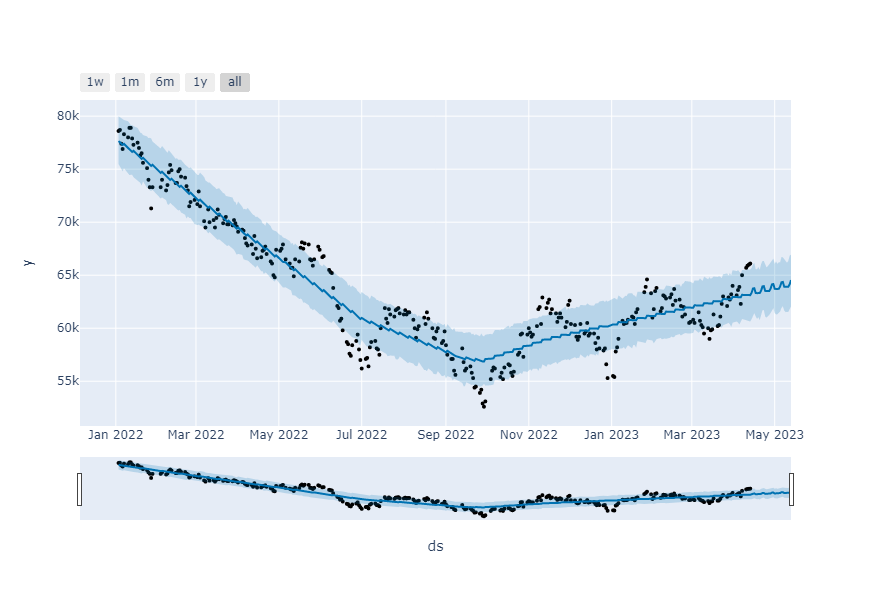

In [39]:
# 이왕이면 plotly 사용
fig = plot_plotly(m,forecast)
fig

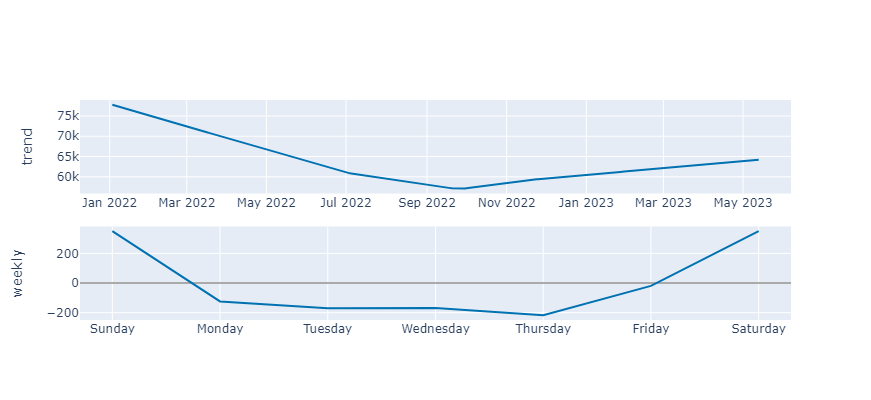

In [37]:
# 세부 컴포넌트를 이용해 데이터 확인
plot_components_plotly(m, forecast) # default 1week

In [38]:
# 변경점을 확인
from prophet.plot import add_changepoints_to_plot

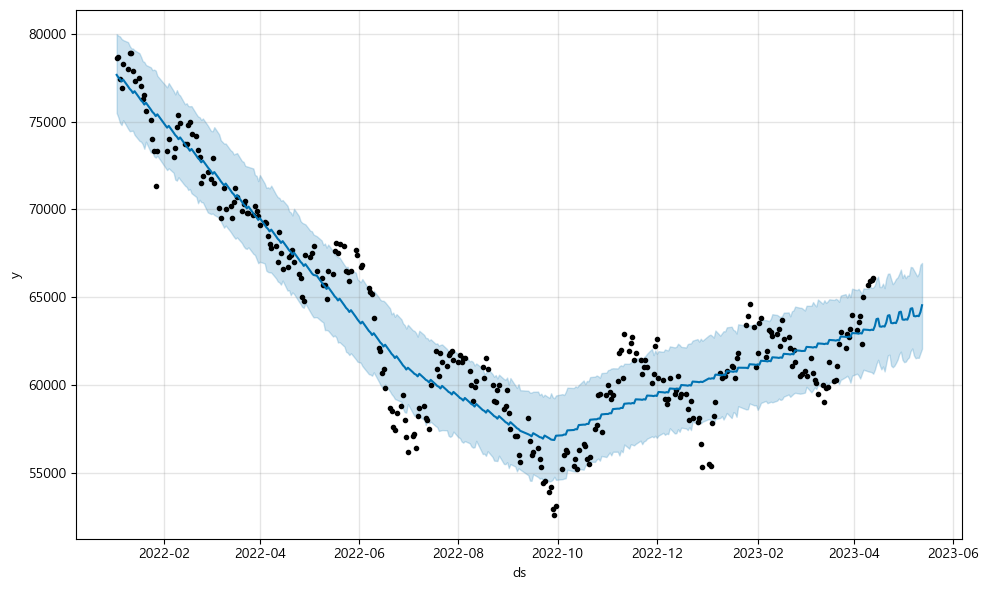

In [40]:
fig = m.plot(forecast)
a = add_changepoints_to_plot 

16:58:37 - cmdstanpy - INFO - Chain [1] start processing
16:58:37 - cmdstanpy - INFO - Chain [1] done processing


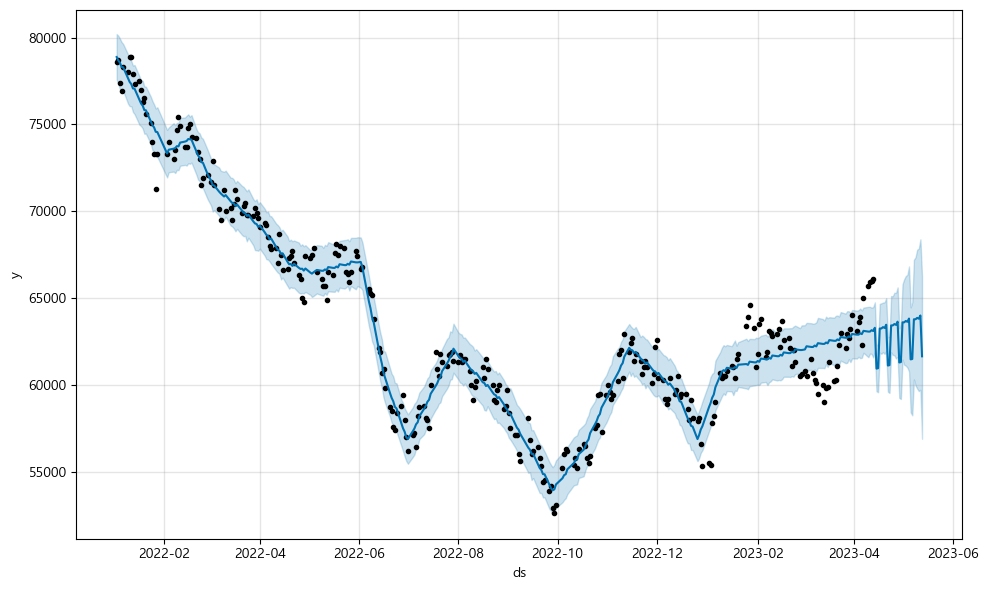

In [47]:
# 누가 오버피팅 되어있냐고 묻는다면? 유연성
# 유연성 => 계수가 낮으면 과소적합, 높으면 과대적합 ==> 하이퍼!!(사람이 하는것)
m = Prophet(changepoint_prior_scale=0.9)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

# 서울시에서 코로나 확진자 발표

In [48]:
covid19 = pd.read_csv("../data/seoul_covid19.csv")
covid19

C:\Users\SW\AppData\Local\Temp\ipykernel_11968\2557537514.py:1: DtypeWarning:

Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.



,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


<Axes: xlabel='확진일'>

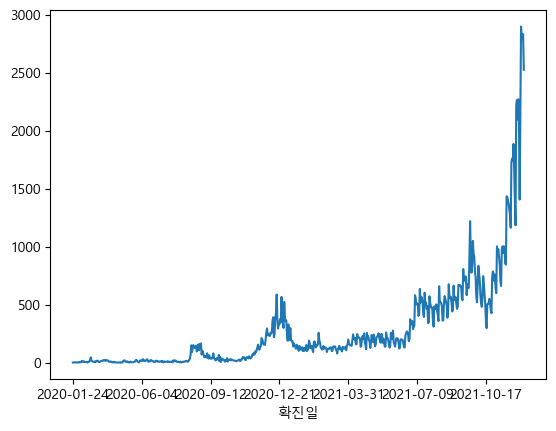

In [50]:
covid19.groupby("확진일")["연번"].count().plot() # 확진일로 그루핑

<Axes: xlabel='확진일'>

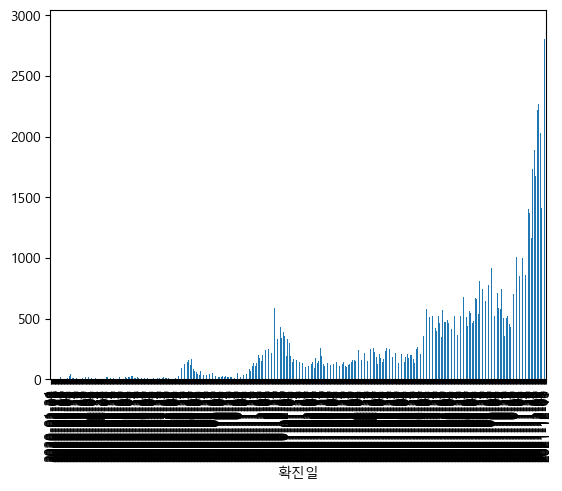

In [51]:
covid19.groupby("확진일")["연번"].count().plot(kind="bar")

In [59]:
covid19["지역"].unique()
# covid19.loc[covid19["지역"] == "관악구 "]

array(['기타', '성북구', '중구', '광진구', '종로구', '중랑구', '강동구', '강북구', '노원구',
       '서대문구', '금천구', '송파구', '은평구', '성동구', '동작구', '양천구', '관악구', '구로구',
       '용산구', '강남구', '도봉구', '동대문구', '서초구', '강서구', '마포구', '영등포구', '타시도',
       '송파', '동대문', '영등포', '서대문'], dtype=object)

In [61]:
covid19["지역"] = covid19["지역"].apply(lambda x : x.strip())
covid19.loc[covid19["지역"] == "송파 "]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부


In [62]:
target = ["동대문", "서대문", "송파", "영등포"]

In [63]:
# 구를 concat!
# sum = 0
# for i in range(10)
#    sum = sum +i
covid19["지역"].apply(lambda x : x + "구" if x in target else x)

0          기타
1         성북구
2          중구
3          기타
4         광진구
         ... 
182553    성북구
182554    마포구
182555    종로구
182556    중랑구
182557    강서구
Name: 지역, Length: 182558, dtype: object

In [64]:
covid19.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


In [76]:
covid19.groupby("확진일")["연번"].count()
# series 타입 => df 로
covid19_df = covid19.groupby("확진일")["연번"].count().reset_index()
covid19_df # DataFrame

,확진일,연번
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [84]:
covid19_df.columns = ["ds", "y"] # 확진일 , 연번
covid19_df

,ds,y
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [85]:
m = Prophet()
m.fit(covid19_df)

17:48:50 - cmdstanpy - INFO - Chain [1] start processing
17:48:50 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
681,2022-01-06
682,2022-01-07
683,2022-01-08
684,2022-01-09
685,2022-01-10


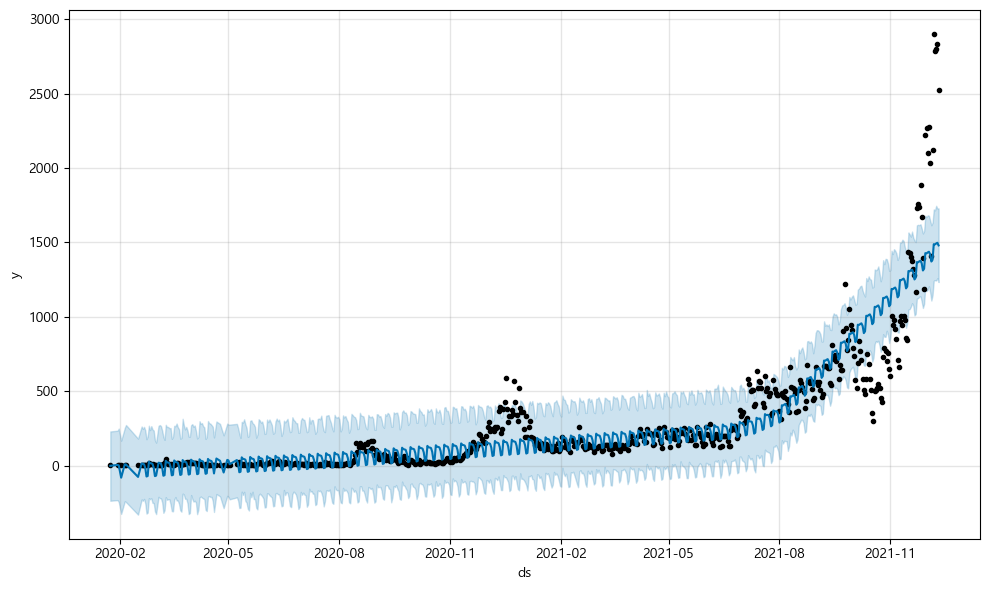

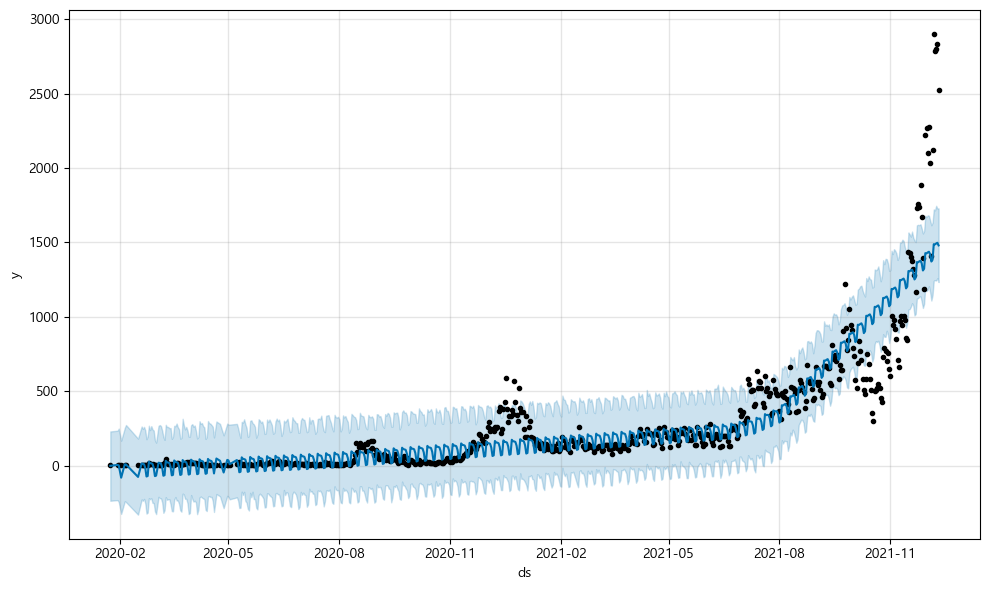

In [87]:
forecast = m.predict()


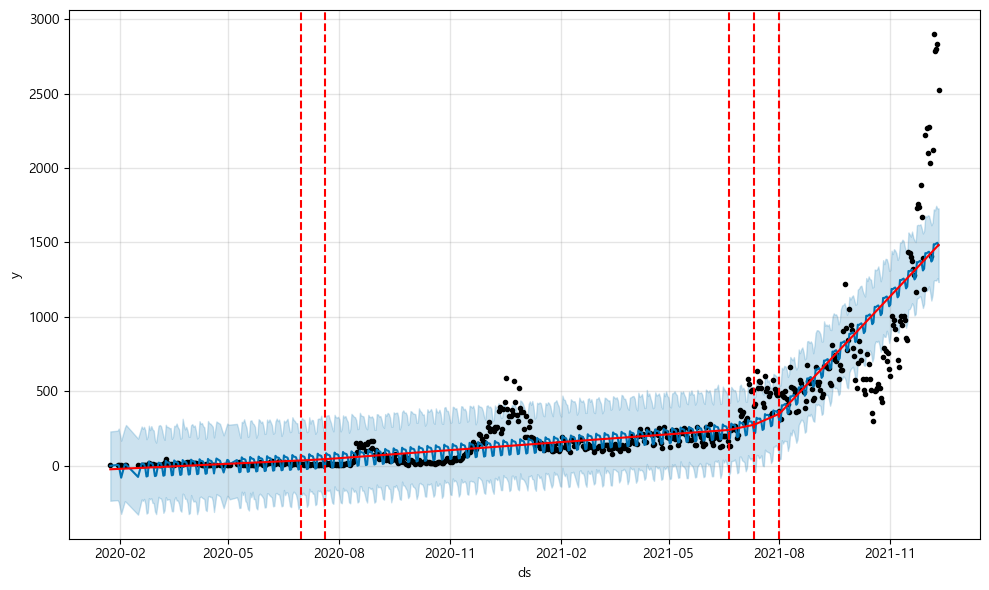

In [89]:
from prophet.plot import add_changepoints_to_plot 
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)